In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

from collections import Counter, defaultdict

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

import itertools

import spacy
# from polyglot.text import Text

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Intro to Natural Language Processing in Python

#### Using Regular Expressions

In [3]:
re.match("abc", "abcdefg")

<re.Match object; span=(0, 3), match='abc'>

We can match whole words

In [4]:
word_regex = "\w+"

In [5]:
re.match(word_regex, "Hi, there! How are you?")

<re.Match object; span=(0, 2), match='Hi'>

And we can also match digits

In [6]:
digit_regex = "\d*"

In [7]:
re.match(digit_regex, "42")

<re.Match object; span=(0, 2), match='42'>

We can match spaces ' '

In [8]:
space_regex = "\s"

In [9]:
re.match(digit_regex, " '' ")

<re.Match object; span=(0, 0), match=''>

Alternatively, if we want to negate some ofthe above, we use the capitalized leter symbol. Example: \W+, \D, \S and so on. In addition, you can create a group of characters.

In [10]:
group_regex = "[a-z]"

In [11]:
re.match(group_regex, "aaaabnn")

<re.Match object; span=(0, 1), match='a'>

We will now practice some of the regex methods. We start with finding all patterns in a string:

In [12]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"
PATTERN = r"\w+"
re.findall(PATTERN, my_string)

['Let',
 's',
 'write',
 'RegEx',
 'Won',
 't',
 'that',
 'be',
 'fun',
 'I',
 'sure',
 'think',
 'so',
 'Can',
 'you',
 'find',
 '4',
 'sentences',
 'Or',
 'perhaps',
 'all',
 '19',
 'words']

Let us now write a pattern to match sentence endings


In [13]:
sentence_endings = r"[.?!]"
re.split(sentence_endings, my_string)

["Let's write RegEx",
 "  Won't that be fun",
 '  I sure think so',
 '  Can you find 4 sentences',
 '  Or perhaps, all 19 words',
 '']

Let us now all find all capitalized words in my_string and print the result

In [14]:
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['Let', 'RegEx', 'Won', 'Can', 'Or']


We will also split my_string on spaces and print the result.

In [15]:
spaces = r"\s+"
print(re.split(spaces, my_string))

["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']


And finally we get all the digits from the string.

In [16]:
digits = r"\d+"
print(re.findall(digits, my_string))

['4', '19']


#### Tokenization

Let us now get to know the functionality of the nltk.tokenize library

In [17]:
word_tokenize(my_string)

['Let',
 "'s",
 'write',
 'RegEx',
 '!',
 'Wo',
 "n't",
 'that',
 'be',
 'fun',
 '?',
 'I',
 'sure',
 'think',
 'so',
 '.',
 'Can',
 'you',
 'find',
 '4',
 'sentences',
 '?',
 'Or',
 'perhaps',
 ',',
 'all',
 '19',
 'words',
 '?']

Going back to regular expressions, let us see what is the difference between the search() and match() methods.

In [18]:
re.match('abc', 'abcde')

<re.Match object; span=(0, 3), match='abc'>

In [19]:
re.search('abc', 'abcde')

<re.Match object; span=(0, 3), match='abc'>

In [20]:
re.match('cd', 'abcde')

In [21]:
re.search('cd', 'abcde')

<re.Match object; span=(2, 4), match='cd'>

match() only matches a string from the beginning, while search() matches from anywhere in the string.

In [22]:
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

We will firstly split the string into sentences.

In [23]:
sentences = sent_tokenize(scene_one)

We can use word_tokenize to tokenize the fourth sentence: tokenized_sent

In [24]:
tokenized_sent = sent_tokenize(scene_one[3])

Then we make a set of unique tokens in the entire scene: unique_tokens

In [25]:
unique_tokens = set(word_tokenize(scene_one))
print(unique_tokens)

{'not', 'in', 'plover', 'Pull', 'Will', 'Arthur', 'go', 'back', 'horse', 'minute', 'It', 'master', 'strangers', 'What', 'court', 'maybe', 'am', 'Listen', 'got', 'African', 'Am', "'d", 'just', 'carrying', 'Camelot', 'Wait', 'The', 'sun', '1', 'through', 'European', 'then', 'Oh', 'there', '--', 'forty-three', 'bird', 'found', 'guiding', 'the', 'kingdom', 'tell', 'speak', 'goes', 'and', 'or', 'Supposing', "'em", 'it', 'dorsal', 'why', 'wings', 'beat', 'ounce', 'climes', 'creeper', 'clop', 'does', 'to', 'our', 'Patsy', 'house', 'ratios', 'husk', 'order', 'But', ',', 'Are', 'held', 'feathers', 'Court', 'ridden', 'You', 'they', 'temperate', 'Found', 'this', 'get', 'trusty', 'here', 'ARTHUR', 'Britons', 'son', 'south', 'Not', 'seek', 'They', 'empty', 'Whoa', 'search', 'agree', '.', 'since', 'these', 'could', 'defeator', 'under', 'swallows', "'m", '!', 'using', 'zone', ':', 'point', 'carry', 'grip', 'swallow', 'In', 'Please', 'yeah', 'two', 'tropical', 'simple', 'times', 'Saxons', 'your', "'s"

In [26]:
Counter(word_tokenize(scene_one)).most_common()

[(':', 40),
 ('SOLDIER', 24),
 ('#', 24),
 (',', 23),
 ('1', 19),
 ('?', 19),
 ('.', 18),
 ('!', 17),
 ('ARTHUR', 15),
 ('of', 15),
 ('the', 15),
 ('a', 13),
 ('clop', 9),
 ('I', 6),
 ('you', 6),
 ('swallow', 6),
 ('not', 6),
 ('2', 6),
 ('It', 5),
 ('and', 5),
 ('What', 5),
 ('coconut', 5),
 ('to', 5),
 ('could', 5),
 ('it', 5),
 ('[', 4),
 (']', 4),
 ('is', 4),
 ('Camelot', 4),
 ('my', 4),
 ('have', 4),
 ("'s", 4),
 ('Well', 4),
 ('...', 3),
 ('this', 3),
 ('We', 3),
 ('land', 3),
 ('in', 3),
 ('at', 3),
 ('with', 3),
 ('your', 3),
 ('master', 3),
 ('coconuts', 3),
 ("'d", 3),
 ('carried', 3),
 ('African', 3),
 ('Oh', 3),
 ('yeah', 3),
 ('there', 2),
 ('Arthur', 2),
 ('from', 2),
 ('all', 2),
 ('one', 2),
 ('ridden', 2),
 ('join', 2),
 ('court', 2),
 ('on', 2),
 ('You', 2),
 ("'re", 2),
 ('two', 2),
 ('together', 2),
 ('So', 2),
 ('winter', 2),
 ('through', 2),
 ('Mercea', 2),
 ('--', 2),
 ('them', 2),
 ('In', 2),
 ('The', 2),
 ('may', 2),
 ('or', 2),
 ('are', 2),
 ('They', 2),
 ('be

Let us do some practice:

In [27]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [28]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.+]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [29]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w+]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


We can improve the search with regular expressions by introducing the 'or' operator. In regex it is presented by '|'. In addition, we can pecify a group using '()', as well as we can define an explicit character range with '[]'.

In [30]:
match_digits_and_words = ('(\d+|\w+)')
re.findall(match_digits_and_words, 'He has 11 cats.')

['He', 'has', '11', 'cats']

Let us do some practice.

In [31]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
pattern = r"(\w+|#\d|\?|!)"
regexp_tokenize(my_string, pattern)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [32]:
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [33]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

In [34]:
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [35]:
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [36]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


In [37]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [38]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


Let us now visualise some of the text we analyze with the help of some plots.

In [39]:
with open("holy_grail.txt") as file:
    holy_grail = file.read()

In [40]:
holy_grail

'"SCENE 1: [wind] [clop clop clop] \\nKING ARTHUR: Whoa there!  [clop clop clop] \\nSOLDIER #1: Halt!  Who goes there?\\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\\nSOLDIER #1: Pull the other one!\\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\\nSOLDIER #1: What?  Ridden on a horse?\\nARTHUR: Yes!\\nSOLDIER #1: You\'re using coconuts!\\nARTHUR: What?\\nSOLDIER #1: You\'ve got two empty halves of coconut and you\'re bangin\' \'em together.\\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\\nSOLDIER #1: Where\'d you get the coconuts?\\nARTHUR: We found them.\\nSOLDIER #1: Found them?  In Mercea?  The coconut\'s tropical!\\nARTHUR: What do you mean?\\nSOLDI

In [41]:
type(holy_grail)

str

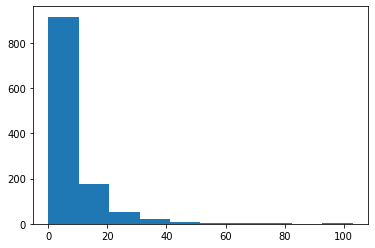

In [42]:
# Split the script into lines: lines
lines = holy_grail.split('\\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

#### Counting words with Bag-of-Words

We will now make use of the collections library and Counter(). We will tokenize a text, creating a bag of words, and print out the most common 

In [43]:
Counter(word_tokenize("The cat is in the box. The cat box.")).most_common()

[('The', 2),
 ('cat', 2),
 ('box', 2),
 ('.', 2),
 ('is', 1),
 ('in', 1),
 ('the', 1)]

In [44]:
article = '\'\'\'Debugging\'\'\' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  \n\nNumerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.\n\nOrigin\nA computer log entry from the Mark&nbsp;II, with a moth taped to the page\n\nThe terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operation, whereupon she remarked that they were "debugging" the system. However the term "bug" in the meaning of technical error dates back at least to 1878 and Thomas Edison (see software bug for a full discussion), and "debugging" seems to have been used as a term in aeronautics before entering the world of computers. Indeed, in an interview Grace Hopper remarked that she was not coining the term{{Citation needed|date=July 2015}}. The moth fit the already existing terminology, so it was saved.  A letter from J. Robert Oppenheimer (director of the WWII atomic bomb "Manhattan" project at Los Alamos, NM) used the term in a letter to Dr. Ernest Lawrence at UC Berkeley, dated October 27, 1944,http://bancroft.berkeley.edu/Exhibits/physics/images/bigscience25.jpg regarding the recruitment of additional technical staff.\n\nThe Oxford English Dictionary entry for "debug" quotes the term "debugging" used in reference to airplane engine testing in a 1945 article in the Journal of the Royal Aeronautical Society. An article in "Airforce" (June 1945 p.&nbsp;50) also refers to debugging, this time of aircraft cameras.  Hopper\'s computer bug|bug was found on September 9, 1947. The term was not adopted by computer programmers until the early 1950s.\nThe seminal article by GillS. Gill, [http://www.jstor.org/stable/98663 The Diagnosis of Mistakes in Programmes on the EDSAC], Proceedings of the Royal Society of London. Series A, Mathematical and Physical Sciences, Vol. 206, No. 1087 (May 22, 1951), pp. 538-554 in 1951 is the earliest in-depth discussion of programming errors, but it does not use the term "bug" or "debugging".\nIn the Association for Computing Machinery|ACM\'s digital library, the term "debugging" is first used in three papers from 1952 ACM National Meetings.Robert V. D. Campbell, [http://portal.acm.org/citation.cfm?id=609784.609786 Evolution of automatic computation], Proceedings of the 1952 ACM national meeting (Pittsburgh), p 29-32, 1952.Alex Orden, [http://portal.acm.org/citation.cfm?id=609784.609793 Solution of systems of linear inequalities on a digital computer], Proceedings of the 1952 ACM national meeting (Pittsburgh), p. 91-95, 1952.Howard B. Demuth, John B. Jackson, Edmund Klein, N. Metropolis, Walter Orvedahl, James H. Richardson, [http://portal.acm.org/citation.cfm?id=800259.808982 MANIAC], Proceedings of the 1952 ACM national meeting (Toronto), p. 13-16 Two of the three use the term in quotation marks.\nBy 1963 "debugging" was a common enough term to be mentioned in passing without explanation on page 1 of the Compatible Time-Sharing System|CTSS manual.[http://www.bitsavers.org/pdf/mit/ctss/CTSS_ProgrammersGuide.pdf The Compatible Time-Sharing System], M.I.T. Press, 1963\n\nKidwell\'s article \'\'Stalking the Elusive Computer Bug\'\'Peggy Aldrich Kidwell, [http://ieeexplore.ieee.org/xpl/freeabs_all.jsp?tp=&arnumber=728224&isnumber=15706 Stalking the Elusive Computer Bug], IEEE Annals of the History of Computing, 1998. discusses the etymology of "bug" and "debug" in greater detail.\n\nScope\nAs software and electronic systems have become generally more complex, the various common debugging techniques have expanded with more methods to detect anomalies, assess impact, and schedule software patches or full updates to a system. The words "anomaly" and "discrepancy" can be used, as being more neutral terms, to avoid the words "error" and "defect" or "bug" where there might be an implication that all so-called \'\'errors\'\', \'\'defects\'\' or \'\'bugs\'\' must be fixed (at all costs). Instead, an impact assessment can be made to determine if changes to remove an \'\'anomaly\'\' (or \'\'discrepancy\'\') would be cost-effective for the system, or perhaps a scheduled new release might render the change(s) unnecessary. Not all issues are life-critical or mission-critical in a system. Also, it is important to avoid the situation where a change might be more upsetting to users, long-term, than living with the known problem(s) (where the "cure would be worse than the disease"). Basing decisions of the acceptability of some anomalies can avoid a culture of a "zero-defects" mandate, where people might be tempted to deny the existence of problems so that the result would appear as zero \'\'defects\'\'. Considering the collateral issues, such as the cost-versus-benefit impact assessment, then broader debugging techniques will expand to determine the frequency of anomalies (how often the same "bugs" occur) to help assess their impact to the overall system.\n\nTools\nDebugging on video game consoles is usually done with special hardware such as this Xbox (console)|Xbox debug unit intended for developers.\n\nDebugging ranges in complexity from fixing simple errors to performing lengthy and tiresome tasks of data collection, analysis, and scheduling updates.  The debugging skill of the programmer can be a major factor in the ability to debug a problem, but the difficulty of software debugging varies greatly with the complexity of the system, and also depends, to some extent, on the programming language(s) used and the available tools, such as \'\'debuggers\'\'. Debuggers are software tools which enable the programmer to monitor the execution (computers)|execution of a program, stop it, restart it, set breakpoints, and change values in memory. The term \'\'debugger\'\' can also refer to the person who is doing the debugging.\n\nGenerally, high-level programming languages, such as Java (programming language)|Java, make debugging easier, because they have features such as exception handling that make real sources of erratic behaviour easier to spot. In programming languages such as C (programming language)|C or assembly language|assembly, bugs may cause silent problems such as memory corruption, and it is often difficult to see where the initial problem happened. In those cases, memory debugging|memory debugger tools may be needed.\n\nIn certain situations, general purpose software tools that are language specific in nature can be very useful.  These take the form of \'\'List of tools for static code analysis|static code analysis tools\'\'.  These tools look for a very specific set of known problems, some common and some rare, within the source code.  All such issues detected by these tools would rarely be picked up by a compiler or interpreter, thus they are not syntax checkers, but more semantic checkers.  Some tools claim to be able to detect 300+ unique problems. Both commercial and free tools exist in various languages.  These tools can be extremely useful when checking very large source trees, where it is impractical to do code walkthroughs.  A typical example of a problem detected would be a variable dereference that occurs \'\'before\'\' the variable is assigned a value.  Another example would be to perform strong type checking when the language does not require such.  Thus, they are better at locating likely errors, versus actual errors.  As a result, these tools have a reputation of false positives.  The old Unix \'\'Lint programming tool|lint\'\' program is an early example.\n\nFor debugging electronic hardware (e.g., computer hardware) as well as low-level software (e.g., BIOSes, device drivers) and firmware, instruments such as oscilloscopes, logic analyzers or in-circuit emulator|in-circuit emulators (ICEs) are often used, alone or in combination.  An ICE may perform many of the typical software debugger\'s tasks on low-level software and firmware.\n\nDebugging process \nNormally the first step in debugging is to attempt to reproduce the problem. This can be a non-trivial task, for example as with Parallel computing|parallel processes or some unusual software bugs. Also, specific user environment and usage history can make it difficult to reproduce the problem.\n\nAfter the bug is reproduced, the input of the program may need to be simplified to make it easier to debug. For example, a bug in a compiler can make it Crash (computing)|crash when parsing some large source file. However, after simplification of the test case, only few lines from the original source file can be sufficient to reproduce the same crash. Such simplification can be made manually, using a Divide and conquer algorithm|divide-and-conquer approach. The programmer will try to remove some parts of original test case and check if the problem still exists. When debugging the problem in a Graphical user interface|GUI, the programmer can try to skip some user interaction from the original problem description and check if remaining actions are sufficient for bugs to appear.\n\nAfter the test case is sufficiently simplified, a programmer can use a debugger tool to examine program states (values of variables, plus the call stack) and track down the origin of the problem(s). Alternatively, Tracing (software)|tracing can be used. In simple cases, tracing is just a few print statements, which output the values of variables at certain points of program execution.{{citation needed|date=February 2016}}\n\n Techniques \n \'\'Interactive debugging\'\'\n \'\'{{visible anchor|Print debugging}}\'\' (or tracing) is the act of watching (live or recorded) trace statements, or print statements, that indicate the flow of execution of a process. This is sometimes called \'\'{{visible anchor|printf debugging}}\'\', due to the use of the printf function in C. This kind of debugging was turned on by the command TRON in the original versions of the novice-oriented BASIC programming language. TRON stood for, "Trace On." TRON caused the line numbers of each BASIC command line to print as the program ran.\n \'\'Remote debugging\'\' is the process of debugging a program running on a system different from the debugger. To start remote debugging, a debugger connects to a remote system over a network. The debugger can then control the execution of the program on the remote system and retrieve information about its state.\n \'\'Post-mortem debugging\'\' is debugging of the program after it has already Crash (computing)|crashed. Related techniques often include various tracing techniques (for example,[http://www.drdobbs.com/tools/185300443 Postmortem Debugging, Stephen Wormuller, Dr. Dobbs Journal, 2006]) and/or analysis of memory dump (or core dump) of the crashed process. The dump of the process could be obtained automatically by the system (for example, when process has terminated due to an unhandled exception), or by a programmer-inserted instruction, or manually by the interactive user.\n \'\'"Wolf fence" algorithm:\'\' Edward Gauss described this simple but very useful and now famous algorithm in a 1982 article for communications of the ACM as follows: "There\'s one wolf in Alaska; how do you find it? First build a fence down the middle of the state, wait for the wolf to howl, determine which side of the fence it is on. Repeat process on that side only, until you get to the point where you can see the wolf."<ref name="communications of the ACM">{{cite journal | title="Pracniques: The "Wolf Fence" Algorithm for Debugging", | author=E. J. Gauss | year=1982}} This is implemented e.g. in the Git (software)|Git version control system as the command \'\'git bisect\'\', which uses the above algorithm to determine which Commit (data management)|commit introduced a particular bug.\n \'\'Delta Debugging\'\'{{snd}} a technique of automating test case simplification.Andreas Zeller: <cite>Why Programs Fail: A Guide to Systematic Debugging</cite>, Morgan Kaufmann, 2005. ISBN 1-55860-866-4{{rp|p.123}}<!-- for redirect from \'Saff Squeeze\' -->\n \'\'Saff Squeeze\'\'{{snd}} a technique of isolating failure within the test using progressive inlining of parts of the failing test.[http://www.threeriversinstitute.org/HitEmHighHitEmLow.html Kent Beck, Hit \'em High, Hit \'em Low: Regression Testing and the Saff Squeeze]\n\nDebugging for embedded systems\nIn contrast to the general purpose computer software design environment, a primary characteristic of embedded environments is the sheer number of different platforms available to the developers (CPU architectures, vendors, operating systems and their variants). Embedded systems are, by definition, not general-purpose designs: they are typically developed for a single task (or small range of tasks), and the platform is chosen specifically to optimize that application. Not only does this fact make life tough for embedded system developers, it also makes debugging and testing of these systems harder as well, since different debugging tools are needed in different platforms.\n\nto identify and fix bugs in the system (e.g. logical or synchronization problems in the code, or a design error in the hardware);\nto collect information about the operating states of the system that may then be used to analyze the system: to find ways to boost its performance or to optimize other important characteristics (e.g. energy consumption, reliability, real-time response etc.).\n\nAnti-debugging\nAnti-debugging is "the implementation of one or more techniques within computer code that hinders attempts at reverse engineering or debugging a target process".<ref name="veracode-antidebugging">{{cite web |url=http://www.veracode.com/blog/2008/12/anti-debugging-series-part-i/ |title=Anti-Debugging Series - Part I |last=Shields |first=Tyler |date=2008-12-02 |work=Veracode |accessdate=2009-03-17}} It is actively used by recognized publishers in copy protection|copy-protection schemas, but is also used by malware to complicate its detection and elimination.<ref name="soft-prot">[http://people.seas.harvard.edu/~mgagnon/software_protection_through_anti_debugging.pdf Software Protection through Anti-Debugging Michael N Gagnon, Stephen Taylor, Anup Ghosh] Techniques used in anti-debugging include:\nAPI-based: check for the existence of a debugger using system information\nException-based: check to see if exceptions are interfered with\nProcess and thread blocks: check whether process and thread blocks have been manipulated\nModified code: check for code modifications made by a debugger handling software breakpoints\nHardware- and register-based: check for hardware breakpoints and CPU registers\nTiming and latency: check the time taken for the execution of instructions\nDetecting and penalizing debugger<ref name="soft-prot" /><!-- reference does not exist -->\n\nAn early example of anti-debugging existed in early versions of Microsoft Word which, if a debugger was detected, produced a message that said: "The tree of evil bears bitter fruit. Now trashing program disk.", after which it caused the floppy disk drive to emit alarming noises with the intent of scaring the user away from attempting it again.<ref name="SecurityEngineeringRA">{{cite book | url=http://www.cl.cam.ac.uk/~rja14/book.html | author=Ross J. Anderson | title=Security Engineering | isbn = 0-471-38922-6 | page=684 }}<ref name="toastytech">{{cite web | url=http://toastytech.com/guis/word1153.html | title=Microsoft Word for DOS 1.15}}\n'

In [45]:
# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 66), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


Let us now do some preprocessing of the text.

In [46]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
english_stops = set(stopwords.words('english'))
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]



In another example:

In [47]:
articles = pd.read_table("articles.txt", header = None)

In [48]:
articles = articles[0].tolist()

In [49]:
articles

['Image copyright EPA Image caption Uber has been criticised many times over the way it runs its business',
 'Ride-sharing firm Uber is facing a criminal investigation by the US government.',
 'The scrutiny has started because the firm is accused of using "secret" software that let it operate in regions where it was banned or restricted.',
 'The software, called "greyball", helped it identify officials seeking to stop the service running.',
 'A spokesman for Uber declined to comment on the investigation, reported the Reuters news agency.',
 'It is claimed greyball was used in several areas, including Portland, Oregon, where the ride service was still seeking official approval to operate.',
 'Bookings blocked',
 "In those areas, transport regulation officials posed as passengers in a bid to prove that the company was operating illegally. Greyball worked out who the officials were and blocked them from booking rides with the company's drivers.",
 'In a letter sent last week to transport 

In [50]:
articles_docs = [word_tokenize(article.lower()) for article in articles]

In [51]:
articles_docs

[['image',
  'copyright',
  'epa',
  'image',
  'caption',
  'uber',
  'has',
  'been',
  'criticised',
  'many',
  'times',
  'over',
  'the',
  'way',
  'it',
  'runs',
  'its',
  'business'],
 ['ride-sharing',
  'firm',
  'uber',
  'is',
  'facing',
  'a',
  'criminal',
  'investigation',
  'by',
  'the',
  'us',
  'government',
  '.'],
 ['the',
  'scrutiny',
  'has',
  'started',
  'because',
  'the',
  'firm',
  'is',
  'accused',
  'of',
  'using',
  '``',
  'secret',
  "''",
  'software',
  'that',
  'let',
  'it',
  'operate',
  'in',
  'regions',
  'where',
  'it',
  'was',
  'banned',
  'or',
  'restricted',
  '.'],
 ['the',
  'software',
  ',',
  'called',
  '``',
  'greyball',
  "''",
  ',',
  'helped',
  'it',
  'identify',
  'officials',
  'seeking',
  'to',
  'stop',
  'the',
  'service',
  'running',
  '.'],
 ['a',
  'spokesman',
  'for',
  'uber',
  'declined',
  'to',
  'comment',
  'on',
  'the',
  'investigation',
  ',',
  'reported',
  'the',
  'reuters',
  'news',

In [52]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles_docs)

In [53]:
dictionary

In [54]:
dictionary.token2id

{'been': 0,
 'business': 1,
 'caption': 2,
 'copyright': 3,
 'criticised': 4,
 'epa': 5,
 'has': 6,
 'image': 7,
 'it': 8,
 'its': 9,
 'many': 10,
 'over': 11,
 'runs': 12,
 'the': 13,
 'times': 14,
 'uber': 15,
 'way': 16,
 '.': 17,
 'a': 18,
 'by': 19,
 'criminal': 20,
 'facing': 21,
 'firm': 22,
 'government': 23,
 'investigation': 24,
 'is': 25,
 'ride-sharing': 26,
 'us': 27,
 "''": 28,
 '``': 29,
 'accused': 30,
 'banned': 31,
 'because': 32,
 'in': 33,
 'let': 34,
 'of': 35,
 'operate': 36,
 'or': 37,
 'regions': 38,
 'restricted': 39,
 'scrutiny': 40,
 'secret': 41,
 'software': 42,
 'started': 43,
 'that': 44,
 'using': 45,
 'was': 46,
 'where': 47,
 ',': 48,
 'called': 49,
 'greyball': 50,
 'helped': 51,
 'identify': 52,
 'officials': 53,
 'running': 54,
 'seeking': 55,
 'service': 56,
 'stop': 57,
 'to': 58,
 'agency': 59,
 'comment': 60,
 'declined': 61,
 'for': 62,
 'news': 63,
 'on': 64,
 'reported': 65,
 'reuters': 66,
 'spokesman': 67,
 'approval': 68,
 'areas': 69,
 'c

In [55]:
#creating a gensim corpus
corpus = [dictionary.doc2bow(doc) for doc in articles_docs]

In [56]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(13, 1),
  (15, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(6, 1),
  (8, 2),
  (13, 2),
  (17, 1),
  (22, 1),
  (25, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(8, 1),
  (13, 2),
  (17, 1),
  (28, 1),
  (29, 1),
  (42, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1)],
 [(13, 2),
  (15, 1),
  (17, 1),
  (18, 1),
  (24, 1),
  (48, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1)],
 [(8, 1),
  (13, 1),
  (17, 1

Another similar example:

In [57]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles_docs)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles_docs]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

computer
[(13, 2), (15, 1), (17, 1), (18, 1), (24, 1), (48, 1), (58, 1), (59, 1), (60, 1), (61, 1)]


In [58]:
# Save the fifth document: doc
doc = corpus[4]

In [59]:
doc

[(13, 2),
 (15, 1),
 (17, 1),
 (18, 1),
 (24, 1),
 (48, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1)]

In [60]:
# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

In [61]:
bow_doc

[(13, 2),
 (15, 1),
 (17, 1),
 (18, 1),
 (24, 1),
 (48, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1)]

In [62]:
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

the 2
uber 1
. 1
a 1
investigation 1


In [63]:
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [64]:
total_word_count

defaultdict(int,
            {0: 12,
             1: 1,
             2: 1,
             3: 1,
             4: 1,
             5: 1,
             6: 26,
             7: 2,
             8: 35,
             9: 10,
             10: 9,
             11: 2,
             12: 1,
             13: 274,
             14: 5,
             15: 9,
             16: 6,
             17: 196,
             18: 100,
             19: 34,
             20: 2,
             21: 2,
             22: 4,
             23: 1,
             24: 3,
             25: 45,
             26: 1,
             27: 3,
             28: 3,
             29: 3,
             30: 1,
             31: 1,
             32: 7,
             33: 99,
             34: 2,
             35: 119,
             36: 3,
             37: 15,
             38: 1,
             39: 1,
             40: 1,
             41: 1,
             42: 8,
             43: 3,
             44: 67,
             45: 6,
             46: 21,
             47: 4,
             48

In [65]:
# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

the 274
, 269
. 196
to 131
of 119


#### TF-IDF

In [66]:
tfidf = TfidfModel(corpus)

In [67]:
tfidf[corpus[1]]

[(13, 0.011130842430785043),
 (15, 0.24499017244627763),
 (17, 0.014140671197317165),
 (18, 0.06120022413356276),
 (19, 0.12941992780931078),
 (20, 0.35872624993217517),
 (21, 0.35872624993217517),
 (22, 0.2957966747293072),
 (23, 0.421655825135043),
 (24, 0.32191480825218544),
 (25, 0.10700794912070341),
 (26, 0.421655825135043),
 (27, 0.32191480825218544)]

In [68]:
corpus[1]

[(13, 1),
 (15, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1)]

As we can see, the difference between a tfidf and a bag of words are quite significant. Let us do some more exercises.


In [69]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

In [70]:
tfidf[doc]

[(13, 0.019957559896947127),
 (15, 0.2196332429986231),
 (17, 0.012677085950968236),
 (18, 0.0548658893721319),
 (24, 0.28859603877054074),
 (48, 0.01835786375194905),
 (58, 0.04210025424472867),
 (59, 0.3780136785853221),
 (60, 0.3780136785853221),
 (61, 0.3215974291320408),
 (62, 0.11602472935782654),
 (63, 0.14741435530232477),
 (64, 0.09851650369801003),
 (65, 0.3780136785853221),
 (66, 0.3780136785853221),
 (67, 0.3780136785853221)]

In [71]:
# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

[(13, 0.019957559896947127), (15, 0.2196332429986231), (17, 0.012677085950968236), (18, 0.0548658893721319), (24, 0.28859603877054074)]


In [72]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

In [73]:
sorted_tfidf_weights

[(59, 0.3780136785853221),
 (60, 0.3780136785853221),
 (65, 0.3780136785853221),
 (66, 0.3780136785853221),
 (67, 0.3780136785853221),
 (61, 0.3215974291320408),
 (24, 0.28859603877054074),
 (15, 0.2196332429986231),
 (63, 0.14741435530232477),
 (62, 0.11602472935782654),
 (64, 0.09851650369801003),
 (18, 0.0548658893721319),
 (58, 0.04210025424472867),
 (13, 0.019957559896947127),
 (48, 0.01835786375194905),
 (17, 0.012677085950968236)]

In [74]:
# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

agency 0.3780136785853221
comment 0.3780136785853221
reported 0.3780136785853221
reuters 0.3780136785853221
spokesman 0.3780136785853221


#### Named entity recognition

In [75]:
sentence = "In New York I like to ride the metro to visit MOMA and some restaurants rated well by Ruth Reichl."

In [76]:
tokenized_sent = word_tokenize(sentence)

In [77]:
tagged_sent = nltk.pos_tag(tokenized_sent)

In [78]:
tagged_sent

[('In', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('I', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('ride', 'VB'),
 ('the', 'DT'),
 ('metro', 'NN'),
 ('to', 'TO'),
 ('visit', 'VB'),
 ('MOMA', 'NNP'),
 ('and', 'CC'),
 ('some', 'DT'),
 ('restaurants', 'NNS'),
 ('rated', 'VBN'),
 ('well', 'RB'),
 ('by', 'IN'),
 ('Ruth', 'NNP'),
 ('Reichl', 'NNP'),
 ('.', '.')]

In [79]:
tagged_sent[:3]

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

In [80]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  metro/NN
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


Let us do some more practice:


In [81]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)
print(sentences[:2])

["'''Debugging''' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.", 'Numerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.']


In [82]:
# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]
token_sentences[:1]

[["'",
  "''",
  'Debugging',
  "''",
  "'",
  'is',
  'the',
  'process',
  'of',
  'finding',
  'and',
  'resolving',
  'of',
  'defects',
  'that',
  'prevent',
  'correct',
  'operation',
  'of',
  'computer',
  'software',
  'or',
  'a',
  'system',
  '.']]

In [83]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
pos_sentences[:2]

[[("'", "''"),
  ("''", "''"),
  ('Debugging', 'VBG'),
  ("''", "''"),
  ("'", "''"),
  ('is', 'VBZ'),
  ('the', 'DT'),
  ('process', 'NN'),
  ('of', 'IN'),
  ('finding', 'VBG'),
  ('and', 'CC'),
  ('resolving', 'VBG'),
  ('of', 'IN'),
  ('defects', 'NNS'),
  ('that', 'WDT'),
  ('prevent', 'VBP'),
  ('correct', 'JJ'),
  ('operation', 'NN'),
  ('of', 'IN'),
  ('computer', 'NN'),
  ('software', 'NN'),
  ('or', 'CC'),
  ('a', 'DT'),
  ('system', 'NN'),
  ('.', '.')],
 [('Numerous', 'JJ'),
  ('books', 'NNS'),
  ('have', 'VBP'),
  ('been', 'VBN'),
  ('written', 'VBN'),
  ('about', 'IN'),
  ('debugging', 'NN'),
  ('(', '('),
  ('see', 'VB'),
  ('below', 'IN'),
  (':', ':'),
  ('#', '#'),
  ('Further', 'NNP'),
  ('reading|Further', 'RB'),
  ('reading', 'VBG'),
  (')', ')'),
  (',', ','),
  ('as', 'IN'),
  ('it', 'PRP'),
  ('involves', 'VBZ'),
  ('numerous', 'JJ'),
  ('aspects', 'NNS'),
  (',', ','),
  ('including', 'VBG'),
  ('interactive', 'JJ'),
  ('debugging', 'NN'),
  (',', ','),
  ('cont

In [84]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
type(chunked_sentences)

generator

In [85]:
chunked_sentences = list(chunked_sentences)

In [86]:
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        # if hasattr(chunk, "label")  and chunk.label() == "NE":
            print(chunk)

("'", "''")
("''", "''")
('Debugging', 'VBG')
("''", "''")
("'", "''")
('is', 'VBZ')
('the', 'DT')
('process', 'NN')
('of', 'IN')
('finding', 'VBG')
('and', 'CC')
('resolving', 'VBG')
('of', 'IN')
('defects', 'NNS')
('that', 'WDT')
('prevent', 'VBP')
('correct', 'JJ')
('operation', 'NN')
('of', 'IN')
('computer', 'NN')
('software', 'NN')
('or', 'CC')
('a', 'DT')
('system', 'NN')
('.', '.')
('Numerous', 'JJ')
('books', 'NNS')
('have', 'VBP')
('been', 'VBN')
('written', 'VBN')
('about', 'IN')
('debugging', 'NN')
('(', '(')
('see', 'VB')
('below', 'IN')
(':', ':')
('#', '#')
('Further', 'NNP')
('reading|Further', 'RB')
('reading', 'VBG')
(')', ')')
(',', ',')
('as', 'IN')
('it', 'PRP')
('involves', 'VBZ')
('numerous', 'JJ')
('aspects', 'NNS')
(',', ',')
('including', 'VBG')
('interactive', 'JJ')
('debugging', 'NN')
(',', ',')
('control', 'NN')
('flow', 'NN')
(',', ',')
('integration', 'NN')
('testing', 'NN')
(',', ',')
('Logfile|log', 'NNP')
('files', 'VBZ')
(',', ',')
('monitoring', 'NN'

(',', ',')
('versus', 'FW')
('actual', 'JJ')
('errors', 'NNS')
('.', '.')
('As', 'IN')
('a', 'DT')
('result', 'NN')
(',', ',')
('these', 'DT')
('tools', 'NNS')
('have', 'VBP')
('a', 'DT')
('reputation', 'NN')
('of', 'IN')
('false', 'JJ')
('positives', 'NNS')
('.', '.')
('The', 'DT')
('old', 'JJ')
('Unix', 'NNP')
('``', '``')
('Lint', 'NNP')
('programming', 'NN')
('tool|lint', 'NN')
("''", "''")
('program', 'NN')
('is', 'VBZ')
('an', 'DT')
('early', 'JJ')
('example', 'NN')
('.', '.')
('For', 'IN')
('debugging', 'VBG')
('electronic', 'JJ')
('hardware', 'NN')
('(', '(')
('e.g.', 'NN')
(',', ',')
('computer', 'NN')
('hardware', 'NN')
(')', ')')
('as', 'RB')
('well', 'RB')
('as', 'IN')
('low-level', 'JJ')
('software', 'NN')
('(', '(')
('e.g.', 'UH')
(',', ',')
(NE BIOSes/NNP)
(',', ',')
('device', 'NN')
('drivers', 'NNS')
(')', ')')
('and', 'CC')
('firmware', 'NN')
(',', ',')
('instruments', 'NNS')
('such', 'JJ')
('as', 'IN')
('oscilloscopes', 'NNS')
(',', ',')
('logic', 'JJ')
('analyzers',

(',', ',')
('or', 'CC')
('a', 'DT')
('design', 'NN')
('error', 'NN')
('in', 'IN')
('the', 'DT')
('hardware', 'NN')
(')', ')')
(';', ':')
('to', 'TO')
('collect', 'VB')
('information', 'NN')
('about', 'IN')
('the', 'DT')
('operating', 'NN')
('states', 'NNS')
('of', 'IN')
('the', 'DT')
('system', 'NN')
('that', 'WDT')
('may', 'MD')
('then', 'RB')
('be', 'VB')
('used', 'VBN')
('to', 'TO')
('analyze', 'VB')
('the', 'DT')
('system', 'NN')
(':', ':')
('to', 'TO')
('find', 'VB')
('ways', 'NNS')
('to', 'TO')
('boost', 'VB')
('its', 'PRP$')
('performance', 'NN')
('or', 'CC')
('to', 'TO')
('optimize', 'VB')
('other', 'JJ')
('important', 'JJ')
('characteristics', 'NNS')
('(', '(')
('e.g', 'NN')
('.', '.')
('energy', 'NN')
('consumption', 'NN')
(',', ',')
('reliability', 'NN')
(',', ',')
('real-time', 'JJ')
('response', 'NN')
('etc', 'NN')
('.', '.')
(')', ')')
('.', '.')
('Anti-debugging', 'JJ')
('Anti-debugging', 'NNP')
('is', 'VBZ')
('``', '``')
('the', 'DT')
('implementation', 'NN')
('of', 'IN

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

In [87]:
chunked_sentences

[Tree('S', [("'", "''"), ("''", "''"), ('Debugging', 'VBG'), ("''", "''"), ("'", "''"), ('is', 'VBZ'), ('the', 'DT'), ('process', 'NN'), ('of', 'IN'), ('finding', 'VBG'), ('and', 'CC'), ('resolving', 'VBG'), ('of', 'IN'), ('defects', 'NNS'), ('that', 'WDT'), ('prevent', 'VBP'), ('correct', 'JJ'), ('operation', 'NN'), ('of', 'IN'), ('computer', 'NN'), ('software', 'NN'), ('or', 'CC'), ('a', 'DT'), ('system', 'NN'), ('.', '.')]),
 Tree('S', [('Numerous', 'JJ'), ('books', 'NNS'), ('have', 'VBP'), ('been', 'VBN'), ('written', 'VBN'), ('about', 'IN'), ('debugging', 'NN'), ('(', '('), ('see', 'VB'), ('below', 'IN'), (':', ':'), ('#', '#'), ('Further', 'NNP'), ('reading|Further', 'RB'), ('reading', 'VBG'), (')', ')'), (',', ','), ('as', 'IN'), ('it', 'PRP'), ('involves', 'VBZ'), ('numerous', 'JJ'), ('aspects', 'NNS'), (',', ','), ('including', 'VBG'), ('interactive', 'JJ'), ('debugging', 'NN'), (',', ','), ('control', 'NN'), ('flow', 'NN'), (',', ','), ('integration', 'NN'), ('testing', 'NN')

In [88]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

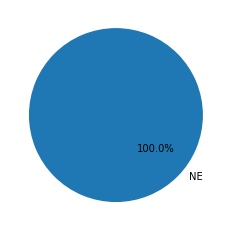

In [89]:
# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

#### Working with Spacy

In [90]:
spacy.prefer_gpu()
nlp = spacy.load('en_core_web_sm')

In [91]:
nlp.entity

In [92]:
doc = nlp("Berlin in the capital of Germany; and the residence of chancellor Angela Merkel")

In [93]:
doc.ents

(Berlin, Germany, Angela Merkel)

In [94]:
type(doc)

spacy.tokens.doc.Doc

In [95]:
doc.ents[0]

Berlin

In [96]:
doc.ents[0].label

384

In [97]:
doc.ents[0].label_

'GPE'

Let us do some exercises.

In [98]:
article = "\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly."

In [99]:
# Instantiate the English model: nlp
nlp = spacy.load("en_core_web_sm",tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)
    
# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG unroll.me
ORG Apple
PERSON Travis Kalanick
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


#### Classifying fake news with NLP

In [100]:
df = pd.read_csv("fake_or_real_news.csv")

In [101]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [102]:
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [103]:
# Create a series to store the labels: y
y = df["label"]

In [104]:
type(y)

pandas.core.series.Series

In [105]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [106]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], y, test_size = 0.33, random_state = 53)

In [107]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

In [108]:
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [109]:
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

In [110]:
# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

In [111]:
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '0002', '000ft', '000km', '000x', '001', '003', '004']


Now instead of with a bag of words, perform the same thing with a TfIDF

In [112]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

In [113]:
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [114]:
# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

In [115]:
# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

In [116]:
# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['00', '000', '0000', '0002', '000ft', '000km', '000x', '001', '003', '004']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07655224 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [117]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [118]:
count_df.head()

,00,000,0000,0002,000ft,000km,000x,001,003,004,...,ťwho,ťđ,ελληνικά,русский,эa,эin,эthe,яркий,عربي,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [120]:
tfidf_df.head()

,00,000,0000,0002,000ft,000km,000x,001,003,004,...,ťwho,ťđ,ελληνικά,русский,эa,эin,эthe,яркий,عربي,ยงade
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.076552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


#### Training and testing a model with scikit-learn

In [122]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.886232481450948
[[494 104]
 [ 34 581]]


Now let us do the same thing but with a TfidfVectorizer instead of a CountVectorizer

In [123]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.8013190436933223
[[367 231]
 [ 10 605]]


Let us now try to improve our model.

In [124]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.05)

In [125]:
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

In [126]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.875515251442704

Alpha:  0.05
Score:  0.8944765045342127

Alpha:  0.1
Score:  0.887881286067601

Alpha:  0.15000000000000002
Score:  0.877164056059357

Alpha:  0.2
Score:  0.8722176422093982

Alpha:  0.25
Score:  0.8664468260511129

Alpha:  0.30000000000000004
Score:  0.8532563891178895

Alpha:  0.35000000000000003
Score:  0.8491343775762572

Alpha:  0.4
Score: 

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


 0.8466611706512778

Alpha:  0.45
Score:  0.8441879637262985

Alpha:  0.5
Score:  0.8400659521846661

Alpha:  0.55
Score:  0.8351195383347073

Alpha:  0.6000000000000001
Score:  0.8260511129431163

Alpha:  0.65
Score:  0.8202802967848309

Alpha:  0.7000000000000001
Score:  0.8186314921681781

Alpha:  0.75
Score:  0.8161582852431987

Alpha:  0.8
Score:  0.8128606760098929

Alpha:  0.8500000000000001
Score:  0.8103874690849134

Alpha:  0.9
Score:  0.8070898598516076

Alpha:  0.9500000000000001
Score:  0.8037922506183017



In [127]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.004182898184979, '0002'), (-11.004182898184979, '000km'), (-11.004182898184979, '004'), (-11.004182898184979, '004s'), (-11.004182898184979, '005'), (-11.004182898184979, '007'), (-11.004182898184979, '007s'), (-11.004182898184979, '0099'), (-11.004182898184979, '00am'), (-11.004182898184979, '00p'), (-11.004182898184979, '00pm'), (-11.004182898184979, '013c2812c9'), (-11.004182898184979, '018'), (-11.004182898184979, '02welcome'), (-11.004182898184979, '030'), (-11.004182898184979, '031'), (-11.004182898184979, '032'), (-11.004182898184979, '0325'), (-11.004182898184979, '033'), (-11.004182898184979, '034')]
REAL [(-7.957636465120789, 'gop'), (-7.931725912783042, 'rubio'), (-7.897895672942864, 'bush'), (-7.865185470028838, 'republicans'), (-7.859605696093187, 'voters'), (-7.857346387602677, 'house'), (-7.788182889561659, 'people'), (-7.787512150416511, 'percent'), (-7.691849475542922, 'party'), (-7.66952397251611, 'new'), (-7.578432845441117, 'republican'), (-7.576940634155